# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

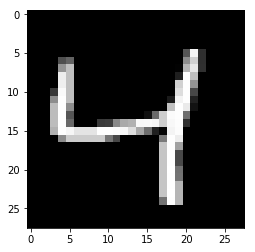

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [11]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim , activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs_, image_size , activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [12]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [13]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7089
Epoch: 1/20... Training loss: 0.6724
Epoch: 1/20... Training loss: 0.6371
Epoch: 1/20... Training loss: 0.6074
Epoch: 1/20... Training loss: 0.5755
Epoch: 1/20... Training loss: 0.5482
Epoch: 1/20... Training loss: 0.5258
Epoch: 1/20... Training loss: 0.5038
Epoch: 1/20... Training loss: 0.4836
Epoch: 1/20... Training loss: 0.4625
Epoch: 1/20... Training loss: 0.4448
Epoch: 1/20... Training loss: 0.4281
Epoch: 1/20... Training loss: 0.4171
Epoch: 1/20... Training loss: 0.4019
Epoch: 1/20... Training loss: 0.3880
Epoch: 1/20... Training loss: 0.3813
Epoch: 1/20... Training loss: 0.3709
Epoch: 1/20... Training loss: 0.3614
Epoch: 1/20... Training loss: 0.3512
Epoch: 1/20... Training loss: 0.3463
Epoch: 1/20... Training loss: 0.3350
Epoch: 1/20... Training loss: 0.3325
Epoch: 1/20... Training loss: 0.3243
Epoch: 1/20... Training loss: 0.3145
Epoch: 1/20... Training loss: 0.3144
Epoch: 1/20... Training loss: 0.3063
Epoch: 1/20... Training loss: 0.3004
E

Epoch: 1/20... Training loss: 0.1556
Epoch: 1/20... Training loss: 0.1577
Epoch: 1/20... Training loss: 0.1624
Epoch: 1/20... Training loss: 0.1631
Epoch: 1/20... Training loss: 0.1607
Epoch: 1/20... Training loss: 0.1562
Epoch: 1/20... Training loss: 0.1520
Epoch: 1/20... Training loss: 0.1592
Epoch: 1/20... Training loss: 0.1573
Epoch: 1/20... Training loss: 0.1606
Epoch: 1/20... Training loss: 0.1565
Epoch: 1/20... Training loss: 0.1541
Epoch: 1/20... Training loss: 0.1525
Epoch: 1/20... Training loss: 0.1570
Epoch: 1/20... Training loss: 0.1538
Epoch: 1/20... Training loss: 0.1548
Epoch: 1/20... Training loss: 0.1583
Epoch: 1/20... Training loss: 0.1506
Epoch: 1/20... Training loss: 0.1604
Epoch: 1/20... Training loss: 0.1578
Epoch: 1/20... Training loss: 0.1572
Epoch: 1/20... Training loss: 0.1577
Epoch: 1/20... Training loss: 0.1523
Epoch: 1/20... Training loss: 0.1544
Epoch: 1/20... Training loss: 0.1537
Epoch: 1/20... Training loss: 0.1525
Epoch: 1/20... Training loss: 0.1574
E

Epoch: 2/20... Training loss: 0.1345
Epoch: 2/20... Training loss: 0.1310
Epoch: 2/20... Training loss: 0.1304
Epoch: 2/20... Training loss: 0.1263
Epoch: 2/20... Training loss: 0.1331
Epoch: 2/20... Training loss: 0.1330
Epoch: 2/20... Training loss: 0.1279
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1337
Epoch: 2/20... Training loss: 0.1303
Epoch: 2/20... Training loss: 0.1317
Epoch: 2/20... Training loss: 0.1268
Epoch: 2/20... Training loss: 0.1297
Epoch: 2/20... Training loss: 0.1268
Epoch: 2/20... Training loss: 0.1292
Epoch: 2/20... Training loss: 0.1311
Epoch: 2/20... Training loss: 0.1298
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1304
Epoch: 2/20... Training loss: 0.1306
Epoch: 2/20... Training loss: 0.1305
Epoch: 2/20... Training loss: 0.1244
Epoch: 2/20... Training loss: 0.1276
Epoch: 2/20... Training loss: 0.1301
Epoch: 2/20... Training loss: 0.1285
Epoch: 2/20... Training loss: 0.1280
Epoch: 2/20... Training loss: 0.1257
E

Epoch: 3/20... Training loss: 0.1161
Epoch: 3/20... Training loss: 0.1169
Epoch: 3/20... Training loss: 0.1178
Epoch: 3/20... Training loss: 0.1174
Epoch: 3/20... Training loss: 0.1145
Epoch: 3/20... Training loss: 0.1152
Epoch: 3/20... Training loss: 0.1139
Epoch: 3/20... Training loss: 0.1202
Epoch: 3/20... Training loss: 0.1168
Epoch: 3/20... Training loss: 0.1204
Epoch: 3/20... Training loss: 0.1148
Epoch: 3/20... Training loss: 0.1162
Epoch: 3/20... Training loss: 0.1199
Epoch: 3/20... Training loss: 0.1154
Epoch: 3/20... Training loss: 0.1178
Epoch: 3/20... Training loss: 0.1165
Epoch: 3/20... Training loss: 0.1137
Epoch: 3/20... Training loss: 0.1127
Epoch: 3/20... Training loss: 0.1154
Epoch: 3/20... Training loss: 0.1117
Epoch: 3/20... Training loss: 0.1170
Epoch: 3/20... Training loss: 0.1138
Epoch: 3/20... Training loss: 0.1143
Epoch: 3/20... Training loss: 0.1153
Epoch: 3/20... Training loss: 0.1115
Epoch: 3/20... Training loss: 0.1159
Epoch: 3/20... Training loss: 0.1116
E

Epoch: 4/20... Training loss: 0.1079
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1045
Epoch: 4/20... Training loss: 0.1079
Epoch: 4/20... Training loss: 0.1069
Epoch: 4/20... Training loss: 0.1062
Epoch: 4/20... Training loss: 0.1069
Epoch: 4/20... Training loss: 0.1052
Epoch: 4/20... Training loss: 0.1070
Epoch: 4/20... Training loss: 0.1071
Epoch: 4/20... Training loss: 0.1043
Epoch: 4/20... Training loss: 0.1069
Epoch: 4/20... Training loss: 0.1060
Epoch: 4/20... Training loss: 0.1086
Epoch: 4/20... Training loss: 0.1051
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1081
Epoch: 4/20... Training loss: 0.1086
Epoch: 4/20... Training loss: 0.1093
Epoch: 4/20... Training loss: 0.1049
Epoch: 4/20... Training loss: 0.1076
Epoch: 4/20... Training loss: 0.1084
Epoch: 4/20... Training loss: 0.1080
Epoch: 4/20... Training loss: 0.1049
Epoch: 4/20... Training loss: 0.1095
Epoch: 4/20... Training loss: 0.1045
Epoch: 4/20... Training loss: 0.1063
E

Epoch: 4/20... Training loss: 0.0977
Epoch: 4/20... Training loss: 0.0987
Epoch: 4/20... Training loss: 0.1021
Epoch: 4/20... Training loss: 0.1003
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.1035
Epoch: 4/20... Training loss: 0.0992
Epoch: 4/20... Training loss: 0.0999
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.1015
Epoch: 4/20... Training loss: 0.1012
Epoch: 4/20... Training loss: 0.1003
Epoch: 4/20... Training loss: 0.0995
Epoch: 4/20... Training loss: 0.1050
Epoch: 4/20... Training loss: 0.0985
Epoch: 4/20... Training loss: 0.1030
Epoch: 4/20... Training loss: 0.1003
Epoch: 4/20... Training loss: 0.1007
Epoch: 4/20... Training loss: 0.1032
Epoch: 4/20... Training loss: 0.1002
Epoch: 4/20... Training loss: 0.1004
Epoch: 4/20... Training loss: 0.1033
Epoch: 4/20... Training loss: 0.0967
E

Epoch: 5/20... Training loss: 0.0945
Epoch: 5/20... Training loss: 0.0994
Epoch: 5/20... Training loss: 0.0949
Epoch: 5/20... Training loss: 0.0959
Epoch: 5/20... Training loss: 0.0975
Epoch: 5/20... Training loss: 0.0960
Epoch: 5/20... Training loss: 0.0970
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0971
Epoch: 5/20... Training loss: 0.0951
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0954
Epoch: 5/20... Training loss: 0.0932
Epoch: 5/20... Training loss: 0.0971
Epoch: 5/20... Training loss: 0.0955
Epoch: 5/20... Training loss: 0.0972
Epoch: 5/20... Training loss: 0.0965
Epoch: 5/20... Training loss: 0.0948
Epoch: 5/20... Training loss: 0.0978
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0953
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0951
Epoch: 5/20... Training loss: 0.0946
Epoch: 5/20... Training loss: 0.0939
Epoch: 5/20... Training loss: 0.0951
Epoch: 5/20... Training loss: 0.0923
E

Epoch: 6/20... Training loss: 0.0931
Epoch: 6/20... Training loss: 0.0902
Epoch: 6/20... Training loss: 0.0933
Epoch: 6/20... Training loss: 0.0896
Epoch: 6/20... Training loss: 0.0897
Epoch: 6/20... Training loss: 0.0888
Epoch: 6/20... Training loss: 0.0928
Epoch: 6/20... Training loss: 0.0923
Epoch: 6/20... Training loss: 0.0935
Epoch: 6/20... Training loss: 0.0889
Epoch: 6/20... Training loss: 0.0917
Epoch: 6/20... Training loss: 0.0921
Epoch: 6/20... Training loss: 0.0895
Epoch: 6/20... Training loss: 0.0928
Epoch: 6/20... Training loss: 0.0884
Epoch: 6/20... Training loss: 0.0889
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0893
Epoch: 6/20... Training loss: 0.0952
Epoch: 6/20... Training loss: 0.0943
Epoch: 6/20... Training loss: 0.0916
Epoch: 6/20... Training loss: 0.0904
Epoch: 6/20... Training loss: 0.0905
Epoch: 6/20... Training loss: 0.0926
Epoch: 6/20... Training loss: 0.0916
Epoch: 6/20... Training loss: 0.0950
Epoch: 6/20... Training loss: 0.0929
E

Epoch: 7/20... Training loss: 0.0888
Epoch: 7/20... Training loss: 0.0878
Epoch: 7/20... Training loss: 0.0900
Epoch: 7/20... Training loss: 0.0878
Epoch: 7/20... Training loss: 0.0891
Epoch: 7/20... Training loss: 0.0873
Epoch: 7/20... Training loss: 0.0879
Epoch: 7/20... Training loss: 0.0901
Epoch: 7/20... Training loss: 0.0903
Epoch: 7/20... Training loss: 0.0884
Epoch: 7/20... Training loss: 0.0898
Epoch: 7/20... Training loss: 0.0892
Epoch: 7/20... Training loss: 0.0883
Epoch: 7/20... Training loss: 0.0900
Epoch: 7/20... Training loss: 0.0885
Epoch: 7/20... Training loss: 0.0859
Epoch: 7/20... Training loss: 0.0877
Epoch: 7/20... Training loss: 0.0901
Epoch: 7/20... Training loss: 0.0897
Epoch: 7/20... Training loss: 0.0865
Epoch: 7/20... Training loss: 0.0863
Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0888
Epoch: 7/20... Training loss: 0.0897
Epoch: 7/20... Training loss: 0.0868
Epoch: 7/20... Training loss: 0.0878
Epoch: 7/20... Training loss: 0.0862
E

Epoch: 7/20... Training loss: 0.0886
Epoch: 7/20... Training loss: 0.0870
Epoch: 7/20... Training loss: 0.0825
Epoch: 7/20... Training loss: 0.0867
Epoch: 7/20... Training loss: 0.0832
Epoch: 7/20... Training loss: 0.0883
Epoch: 7/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0881
Epoch: 7/20... Training loss: 0.0823
Epoch: 7/20... Training loss: 0.0854
Epoch: 7/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0851
Epoch: 7/20... Training loss: 0.0841
Epoch: 7/20... Training loss: 0.0893
Epoch: 7/20... Training loss: 0.0861
Epoch: 7/20... Training loss: 0.0853
Epoch: 7/20... Training loss: 0.0876
Epoch: 7/20... Training loss: 0.0838
Epoch: 7/20... Training loss: 0.0868
Epoch: 7/20... Training loss: 0.0810
Epoch: 7/20... Training loss: 0.0829
Epoch: 7/20... Training loss: 0.0846
Epoch: 7/20... Training loss: 0.0847
Epoch: 7/20... Training loss: 0.0877
Epoch: 7/20... Training loss: 0.0828
Epoch: 7/20... Training loss: 0.0861
Epoch: 7/20... Training loss: 0.0881
E

Epoch: 8/20... Training loss: 0.0846
Epoch: 8/20... Training loss: 0.0823
Epoch: 8/20... Training loss: 0.0819
Epoch: 8/20... Training loss: 0.0821
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0846
Epoch: 8/20... Training loss: 0.0845
Epoch: 8/20... Training loss: 0.0826
Epoch: 8/20... Training loss: 0.0809
Epoch: 8/20... Training loss: 0.0836
Epoch: 8/20... Training loss: 0.0816
Epoch: 8/20... Training loss: 0.0840
Epoch: 8/20... Training loss: 0.0853
Epoch: 8/20... Training loss: 0.0814
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0855
Epoch: 8/20... Training loss: 0.0831
Epoch: 8/20... Training loss: 0.0835
Epoch: 8/20... Training loss: 0.0829
Epoch: 8/20... Training loss: 0.0810
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0826
Epoch: 8/20... Training loss: 0.0836
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0834
Epoch: 8/20... Training loss: 0.0834
E

Epoch: 9/20... Training loss: 0.0846
Epoch: 9/20... Training loss: 0.0793
Epoch: 9/20... Training loss: 0.0813
Epoch: 9/20... Training loss: 0.0820
Epoch: 9/20... Training loss: 0.0813
Epoch: 9/20... Training loss: 0.0821
Epoch: 9/20... Training loss: 0.0800
Epoch: 9/20... Training loss: 0.0830
Epoch: 9/20... Training loss: 0.0810
Epoch: 9/20... Training loss: 0.0801
Epoch: 9/20... Training loss: 0.0799
Epoch: 9/20... Training loss: 0.0782
Epoch: 9/20... Training loss: 0.0847
Epoch: 9/20... Training loss: 0.0795
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0804
Epoch: 9/20... Training loss: 0.0810
Epoch: 9/20... Training loss: 0.0802
Epoch: 9/20... Training loss: 0.0822
Epoch: 9/20... Training loss: 0.0807
Epoch: 9/20... Training loss: 0.0822
Epoch: 9/20... Training loss: 0.0793
Epoch: 9/20... Training loss: 0.0795
Epoch: 9/20... Training loss: 0.0813
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0832
Epoch: 9/20... Training loss: 0.0786
E

Epoch: 10/20... Training loss: 0.0810
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0810
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0798
Epoch: 10/20... Training loss: 0.0808
Epoch: 10/20... Training loss: 0.0793
Epoch: 10/20... Training loss: 0.0780
Epoch: 10/20... Training loss: 0.0816
Epoch: 10/20... Training loss: 0.0802
Epoch: 10/20... Training loss: 0.0799
Epoch: 10/20... Training loss: 0.0795
Epoch: 10/20... Training loss: 0.0776
Epoch: 10/20... Training loss: 0.0796
Epoch: 10/20... Training loss: 0.0801
Epoch: 10/20... Training loss: 0.0795
Epoch: 10/20... Training loss: 0.0789
Epoch: 10/20... Training loss: 0.0765
Epoch: 10/20... Training loss: 0.0789
Epoch: 10/20... Training loss: 0.0814
Epoch: 10/20... Training loss: 0.0780
Epoch: 10/20... Training loss: 0.0785
Epoch: 10/20... Training loss: 0.0873
Epoch: 10/20... Training loss: 0.0784
Epoch: 10/20... Training loss: 0.0799
Epoch: 10/20... Training loss: 0.0767
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0758
Epoch: 10/20... Training loss: 0.0763
Epoch: 10/20... Training loss: 0.0779
Epoch: 10/20... Training loss: 0.0786
Epoch: 10/20... Training loss: 0.0772
Epoch: 10/20... Training loss: 0.0784
Epoch: 10/20... Training loss: 0.0770
Epoch: 10/20... Training loss: 0.0767
Epoch: 10/20... Training loss: 0.0786
Epoch: 10/20... Training loss: 0.0748
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0773
Epoch: 10/20... Training loss: 0.0779
Epoch: 10/20... Training loss: 0.0773
Epoch: 10/20... Training loss: 0.0749
Epoch: 10/20... Training loss: 0.0757
Epoch: 10/20... Training loss: 0.0774
Epoch: 10/20... Training loss: 0.0758
Epoch: 10/20... Training loss: 0.0794
Epoch: 10/20... Training loss: 0.0757
Epoch: 10/20... Training loss: 0.0809
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0779
Epoch: 10/20... Training loss: 0.0766
Epoch: 10/20... Training loss: 0.0782
Epoch: 10/20... Training loss: 0.0768
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0745
Epoch: 11/20... Training loss: 0.0738
Epoch: 11/20... Training loss: 0.0766
Epoch: 11/20... Training loss: 0.0787
Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0770
Epoch: 11/20... Training loss: 0.0745
Epoch: 11/20... Training loss: 0.0738
Epoch: 11/20... Training loss: 0.0757
Epoch: 11/20... Training loss: 0.0769
Epoch: 11/20... Training loss: 0.0770
Epoch: 11/20... Training loss: 0.0782
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0768
Epoch: 11/20... Training loss: 0.0769
Epoch: 11/20... Training loss: 0.0751
Epoch: 11/20... Training loss: 0.0757
Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0765
Epoch: 11/20... Training loss: 0.0775
Epoch: 11/20... Training loss: 0.0767
Epoch: 11/20... Training loss: 0.0749
Epoch: 11/20... Training loss: 0.0745
Epoch: 11/20... Training loss: 0.0750
Epoch: 11/20... Training loss: 0.0747
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0740
Epoch: 12/20... Training loss: 0.0750
Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0718
Epoch: 12/20... Training loss: 0.0741
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0740
Epoch: 12/20... Training loss: 0.0747
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0759
Epoch: 12/20... Training loss: 0.0732
Epoch: 12/20... Training loss: 0.0726
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0765
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0744
Epoch: 12/20... Training loss: 0.0738
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20... Training loss: 0.0734
Epoch: 12/20... Training loss: 0.0753
Epoch: 12/20... Training loss: 0.0758
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0784
Epoch: 12/20... Training loss: 0.0730
Epoch: 12/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0744
Epoch: 13/20... Training loss: 0.0727
Epoch: 13/20... Training loss: 0.0740
Epoch: 13/20... Training loss: 0.0763
Epoch: 13/20... Training loss: 0.0715
Epoch: 13/20... Training loss: 0.0755
Epoch: 13/20... Training loss: 0.0755
Epoch: 13/20... Training loss: 0.0772
Epoch: 13/20... Training loss: 0.0714
Epoch: 13/20... Training loss: 0.0754
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0746
Epoch: 13/20... Training loss: 0.0746
Epoch: 13/20... Training loss: 0.0727
Epoch: 13/20... Training loss: 0.0749
Epoch: 13/20... Training loss: 0.0750
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0769
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0745
Epoch: 13/20... Training loss: 0.0713
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0728
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0730
Epoch: 13/20... Training loss: 0.0727
Epoch: 13/20... Training loss: 0.0722
Epoch: 13/20... Training loss: 0.0737
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0733
Epoch: 13/20... Training loss: 0.0728
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0751
Epoch: 13/20... Training loss: 0.0732
Epoch: 13/20... Training loss: 0.0727
Epoch: 13/20... Training loss: 0.0722
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0719
Epoch: 13/20... Training loss: 0.0729
Epoch: 13/20... Training loss: 0.0744
Epoch: 13/20... Training loss: 0.0742
Epoch: 13/20... Training loss: 0.0747
Epoch: 13/20... Training loss: 0.0735
Epoch: 13/20... Training loss: 0.0735
Epoch: 13/20... Training loss: 0.0740
Epoch: 13/20... Training loss: 0.0754
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0744
Epoch: 13/20... Training loss: 0.0751
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0700
Epoch: 14/20... Training loss: 0.0738
Epoch: 14/20... Training loss: 0.0721
Epoch: 14/20... Training loss: 0.0732
Epoch: 14/20... Training loss: 0.0712
Epoch: 14/20... Training loss: 0.0718
Epoch: 14/20... Training loss: 0.0716
Epoch: 14/20... Training loss: 0.0738
Epoch: 14/20... Training loss: 0.0712
Epoch: 14/20... Training loss: 0.0726
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0707
Epoch: 14/20... Training loss: 0.0722
Epoch: 14/20... Training loss: 0.0713
Epoch: 14/20... Training loss: 0.0721
Epoch: 14/20... Training loss: 0.0703
Epoch: 14/20... Training loss: 0.0716
Epoch: 14/20... Training loss: 0.0715
Epoch: 14/20... Training loss: 0.0726
Epoch: 14/20... Training loss: 0.0711
Epoch: 14/20... Training loss: 0.0725
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0704
Epoch: 14/20... Training loss: 0.0722
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0696
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0708
Epoch: 15/20... Training loss: 0.0706
Epoch: 15/20... Training loss: 0.0730
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0740
Epoch: 15/20... Training loss: 0.0724
Epoch: 15/20... Training loss: 0.0683
Epoch: 15/20... Training loss: 0.0714
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0727
Epoch: 15/20... Training loss: 0.0699
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0696
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20... Training loss: 0.0689
Epoch: 15/20... Training loss: 0.0706
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0691
Epoch: 15/20... Training loss: 0.0727
Epoch: 15/20... Training loss: 0.0698
Epoch: 15/20... Training loss: 0.0698
Epoch: 15/20... Training loss: 0.0701
Epoch: 15/20... Training loss: 0.0714
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0728
Epoch: 15/20... Training loss: 0.0714
Epoch: 15/20... Training loss: 0.0704
Epoch: 15/20... Training loss: 0.0695
Epoch: 15/20... Training loss: 0.0688
Epoch: 15/20... Training loss: 0.0690
Epoch: 15/20... Training loss: 0.0716
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0723
Epoch: 15/20... Training loss: 0.0709
Epoch: 15/20... Training loss: 0.0723
Epoch: 15/20... Training loss: 0.0719
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0717
Epoch: 16/20... Training loss: 0.0690
Epoch: 16/20... Training loss: 0.0696
Epoch: 16/20... Training loss: 0.0698
Epoch: 16/20... Training loss: 0.0692
Epoch: 16/20... Training loss: 0.0718
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0706
Epoch: 16/20... Training loss: 0.0693
Epoch: 16/20... Training loss: 0.0695
Epoch: 16/20... Training loss: 0.0708
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0715
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0682
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0695
Epoch: 16/20... Training loss: 0.0699
Epoch: 16/20... Training loss: 0.0679
Epoch: 16/20... Training loss: 0.0734
Epoch: 16/20... Training loss: 0.0675
Epoch: 16/20... Training loss: 0.0704
Epoch: 16/20... Training loss: 0.0707
Epoch: 16/20... Training loss: 0.0695
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0695
Epoch: 17/20... Training loss: 0.0685
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0697
Epoch: 17/20... Training loss: 0.0693
Epoch: 17/20... Training loss: 0.0682
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0707
Epoch: 17/20... Training loss: 0.0695
Epoch: 17/20... Training loss: 0.0695
Epoch: 17/20... Training loss: 0.0717
Epoch: 17/20... Training loss: 0.0717
Epoch: 17/20... Training loss: 0.0704
Epoch: 17/20... Training loss: 0.0700
Epoch: 17/20... Training loss: 0.0694
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0694
Epoch: 17/20... Training loss: 0.0708
Epoch: 17/20... Training loss: 0.0699
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20... Training loss: 0.0712
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0711
Epoch: 17/20... Training loss: 0.0712
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0717
Epoch: 18/20... Training loss: 0.0706
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0704
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0697
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0706
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0674
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0698
Epoch: 18/20... Training loss: 0.0651
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0680
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0692
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0673
Epoch: 19/20... Training loss: 0.0675
Epoch: 19/20... Training loss: 0.0698
Epoch: 19/20... Training loss: 0.0683
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0668
Epoch: 19/20... Training loss: 0.0664
Epoch: 19/20... Training loss: 0.0671
Epoch: 19/20... Training loss: 0.0680
Epoch: 19/20... Training loss: 0.0681
Epoch: 19/20... Training loss: 0.0668
Epoch: 19/20... Training loss: 0.0676
Epoch: 19/20... Training loss: 0.0687
Epoch: 19/20... Training loss: 0.0690
Epoch: 19/20... Training loss: 0.0683
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0692
Epoch: 19/20... Training loss: 0.0684
Epoch: 19/20... Training loss: 0.0673
Epoch: 19/20... Training loss: 0.0676
Epoch: 19/20... Training loss: 0.0683
Epoch: 19/20... Training loss: 0.0659
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0664
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0690
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0693
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0644
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20... Training loss: 0.0685
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0683
Epoch: 20/20... Training loss: 0.0686
Epoch: 20/20... Training loss: 0.0655
Epoch: 20/20... Training loss: 0.0684
Epoch: 20/20... Training loss: 0.0692
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0650
Epoch: 20/20... Training loss: 0.0654
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

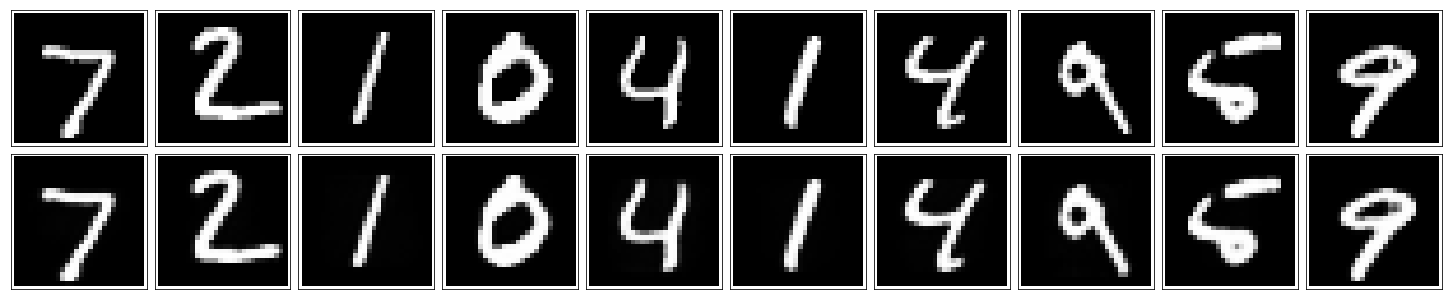

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [15]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.